In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

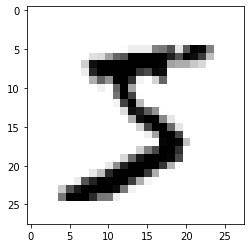

In [6]:
plt.imshow(x_train[0] , cmap = plt.cm.binary)
plt.show()

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

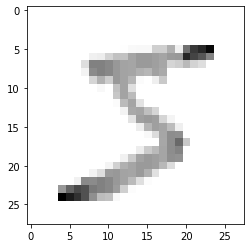

In [8]:
x_train = tf.keras.utils.normalize(x_train,axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
img_size= 28
x_trainr = np.array(x_train).reshape(-1 , img_size,img_size,1) # -1 for max lenght i.e. 60000
x_testr = np.array(x_test).reshape(-1 , img_size,img_size,1)
print("training sample dimention:",x_trainr.shape)
print("testing sample dimention:",x_testr.shape)

training sample dimention: (60000, 28, 28, 1)
testing sample dimention: (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D, MaxPooling2D,Dropout

In [13]:
model = Sequential()
## First convolation layer
model.add(Conv2D(64, (3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

## secomd convolation layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

## third convolation layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

## fully connected layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

## fully connected layers 2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layers
model.add(Dense(10))  # class = 10 becz of 0-9
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam" ,metrics=['accuracy'])

In [16]:
model.fit(x_trainr,y_train ,epochs = 5 , validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 230s 157ms/step - loss: 0.3378 - accuracy: 0.8933 - val_loss: 0.1681 - val_accuracy: 0.9496
Epoch 2/5
1313/1313 [==============================] - 208s 158ms/step - loss: 0.1120 - accuracy: 0.9661 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 3/5
1313/1313 [==============================] - 204s 155ms/step - loss: 0.0820 - accuracy: 0.9756 - val_loss: 0.0917 - val_accuracy: 0.9729
Epoch 4/5
1313/1313 [==============================] - 205s 156ms/step - loss: 0.0660 - accuracy: 0.9799 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 5/5
1313/1313 [==============================] - 197s 150ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0652 - val_accuracy: 0.9800


In [17]:
test_loss, test_acc = model.evaluate(x_testr , y_test)
print("test loss on 10000 test sample" , test_loss)
print("validation accuracy on 10000 test sample", test_acc)

313/313 [==============================] - 16s 51ms/step - loss: 0.0594 - accuracy: 0.9830
test loss on 10000 test sample 0.05943399667739868
validation accuracy on 10000 test sample 0.9829999804496765


In [18]:
prediction = model.predict(x_testr)
print(prediction)

[[1.3198343e-06 2.0449031e-06 1.6799073e-05 ... 9.9995947e-01
  3.4759637e-08 1.1006263e-05]
 [5.9167785e-04 8.7706767e-06 9.9938869e-01 ... 3.5083292e-06
  1.3667462e-06 2.2456142e-07]
 [7.4051206e-07 9.9999416e-01 1.8654083e-07 ... 2.0124212e-06
  5.6265403e-08 3.1662427e-08]
 ...
 [5.7337019e-07 3.1151899e-07 4.7370459e-09 ... 4.2866023e-07
  1.6072077e-05 6.0201390e-05]
 [3.4042747e-05 9.5530890e-09 1.9177471e-10 ... 1.5500014e-08
  1.8449096e-04 1.7079221e-05]
 [5.1111852e-05 2.8884186e-08 2.8442333e-05 ... 8.5693115e-09
  2.2867225e-05 4.5960124e-07]]


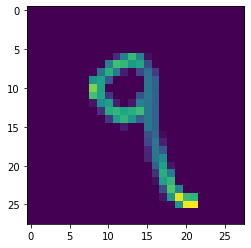

In [19]:
plt.imshow(x_testr[4665])

In [20]:
print(np.argmax(prediction[4665]))

9


In [21]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
